In [1]:
# import datasets
from nilearn import datasets
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

In [3]:
dataset

{'maps': 'C:\\Users\\alexf/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
 'labels': ['Background',
  'Frontal Pole',
  'Insular Cortex',
  'Superior Frontal Gyrus',
  'Middle Frontal Gyrus',
  'Inferior Frontal Gyrus, pars triangularis',
  'Inferior Frontal Gyrus, pars opercularis',
  'Precentral Gyrus',
  'Temporal Pole',
  'Superior Temporal Gyrus, anterior division',
  'Superior Temporal Gyrus, posterior division',
  'Middle Temporal Gyrus, anterior division',
  'Middle Temporal Gyrus, posterior division',
  'Middle Temporal Gyrus, temporooccipital part',
  'Inferior Temporal Gyrus, anterior division',
  'Inferior Temporal Gyrus, posterior division',
  'Inferior Temporal Gyrus, temporooccipital part',
  'Postcentral Gyrus',
  'Superior Parietal Lobule',
  'Supramarginal Gyrus, anterior division',
  'Supramarginal Gyrus, posterior division',
  'Angular Gyrus',
  'Lateral Occipital Cortex, superior division',
  'Lateral Occipital Cortex

In [4]:
atlas_filename

'C:\\Users\\alexf/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz'

In [5]:
labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

In [6]:
print(len(labels))

49


## Get Data

In [7]:
data = datasets.fetch_development_fmri(n_subjects=1)
fmri_filenames = data.func[0]

In [8]:
data.confounds

['C:\\Users\\alexf/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv']

In [9]:
fmri_filenames

'C:\\Users\\alexf/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

In [10]:
# parent paths of pre-processed data
subjectDir = "../data/preprocessed/sub-9001/"
sessionDir = "ses-1/"

#example of arrows slice file path
arrows_slices_file_path = \
    subjectDir + sessionDir + \
    "func/sub-9001_ses-1_task-arrows_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"

# define confounds_regressors path for task-arrows
arrows_confounds_regressors_path = \
    subjectDir + sessionDir + \
    "func/sub-9001_ses-1_task-arrows_desc-confounds_regressors.tsv"

# define new confounds regressors path with no NaNs for task-arrows
no_nan_arrows_confounds_regressors_path = \
    subjectDir + sessionDir + \
    "func/sub-9001_ses-1_task-arrows_desc-confounds_regressors_no_nan.tsv"

# define new confounds regressors path with no NaNs for task-arrows
zero_for_nan_arrows_confounds_regressors_path = \
    subjectDir + sessionDir + \
    "func/sub-9001_ses-1_task-arrows_desc-confounds_regressors_zero_for_nan.tsv"

## Confounds Regressor fill NaNs

In [11]:
df_confounds_regressors = pd.read_csv(arrows_confounds_regressors_path, sep="\t")
df_confounds_regressors

csf  csf_derivative1  csf_derivative1_power2    csf_power2  \
0    4972.488357              NaN                     NaN  2.472564e+07   
1    4967.614855        -4.873502               23.751024  2.467720e+07   
2    4948.788791       -18.826064              354.420677  2.449051e+07   
3    4952.314660         3.525868               12.431748  2.452542e+07   
4    4957.245878         4.931219               24.316918  2.457429e+07   
..           ...              ...                     ...           ...   
347  4905.026630        -5.353640               28.661461  2.405929e+07   
348  4920.232796        15.206167              231.227502  2.420869e+07   
349  4907.424320       -12.808476              164.057060  2.408281e+07   
350  4897.653413        -9.770907               95.470630  2.398701e+07   
351  4899.328273         1.674860                2.805157  2.400342e+07   

     white_matter  white_matter_derivative1  white_matter_power2  \
0     2939.541751                       NaN         8.640906e+06   
1     2934.650743                 -4.891008         8.612175e+06   
2     2930.954479                 -3.696264         8.590494e+06   
3     2932.555697                  1.601218         8.599883e+06   
4     2933.805811                  1.250114         8.607217e+06   
..            ...                       ...                  ...   
347   2939.638403                  4.970495         8.641474e+06   
348   2938.795186                 -0.843217         8.636517e+06   
349   2933.803627                 -4.991558         8.607204e+06   
350   2930.824224                 -2.979404         8.589731e+06   
351   2933.957529                  3.133305         8.608107e+06   

     white_matter_derivative1_power2  global_signal  \
0                                NaN    3378.271329   
1                          23.921960    3375.577770   
2                          13.662370    3375.313723   
3                           2.563900    3379.053781   
4                           1.562786    3383.363374   
..                               ...            ...   
347                        24.705819    3391.188102   
348                         0.711015    3367.133597   
349                        24.915654    3357.777045   
350                         8.876848    3362.294634   
351                         9.817602    3367.619093   

     global_signal_derivative1  ...  aroma_motion_64  aroma_motion_65  \
0                          NaN  ...         1.138285         1.199624   
1                    -2.693559  ...         1.037494         0.568698   
2                    -0.264047  ...         0.261246         1.431770   
3                     3.740058  ...         0.477880         0.910107   
4                     4.309594  ...        -0.301870         1.498544   
..                         ...  ...              ...              ...   
347                  16.486410  ...        -0.927439        -1.224027   
348                 -24.054504  ...         0.447599        -1.445842   
349                  -9.356552  ...        -0.872509        -1.838276   
350                   4.517589  ...        -1.470964        -1.915907   
351                   5.324459  ...        -1.934457        -0.789495   

     aroma_motion_66  aroma_motion_67  aroma_motion_71  aroma_motion_72  \
0           0.257737         1.931127        -0.901766        -2.571631   
1          -0.847416         1.426105        -1.754343        -1.421355   
2          -1.135691         1.015833         1.515621        -1.966372   
3          -1.083449         1.144683        -0.868764        -1.165839   
4           1.710203         1.122013         0.421692        -1.339059   
..               ...              ...              ...              ...   
347         1.709018         0.555258        -0.238408         0.236372   
348        -0.394125        -0.022852        -2.364652         0.800511   
349         0.609693        -1.670757        -0.126166         1.399243   
350    

In [12]:
column_means = df_confounds_regressors.mean()
df_confounds_regressors_fill_na = df_confounds_regressors.fillna(column_means)
df_confounds_regressors_zero_for_nan = df_confounds_regressors.fillna(0)

In [13]:
df_confounds_regressors_fill_na

csf  csf_derivative1  csf_derivative1_power2    csf_power2  \
0    4972.488357        -0.208433              632.082216  2.472564e+07   
1    4967.614855        -4.873502               23.751024  2.467720e+07   
2    4948.788791       -18.826064              354.420677  2.449051e+07   
3    4952.314660         3.525868               12.431748  2.452542e+07   
4    4957.245878         4.931219               24.316918  2.457429e+07   
..           ...              ...                     ...           ...   
347  4905.026630        -5.353640               28.661461  2.405929e+07   
348  4920.232796        15.206167              231.227502  2.420869e+07   
349  4907.424320       -12.808476              164.057060  2.408281e+07   
350  4897.653413        -9.770907               95.470630  2.398701e+07   
351  4899.328273         1.674860                2.805157  2.400342e+07   

     white_matter  white_matter_derivative1  white_matter_power2  \
0     2939.541751                 -0.015909         8.640906e+06   
1     2934.650743                 -4.891008         8.612175e+06   
2     2930.954479                 -3.696264         8.590494e+06   
3     2932.555697                  1.601218         8.599883e+06   
4     2933.805811                  1.250114         8.607217e+06   
..            ...                       ...                  ...   
347   2939.638403                  4.970495         8.641474e+06   
348   2938.795186                 -0.843217         8.636517e+06   
349   2933.803627                 -4.991558         8.607204e+06   
350   2930.824224                 -2.979404         8.589731e+06   
351   2933.957529                  3.133305         8.608107e+06   

     white_matter_derivative1_power2  global_signal  \
0                          34.701413    3378.271329   
1                          23.921960    3375.577770   
2                          13.662370    3375.313723   
3                           2.563900    3379.053781   
4                           1.562786    3383.363374   
..                               ...            ...   
347                        24.705819    3391.188102   
348                         0.711015    3367.133597   
349                        24.915654    3357.777045   
350                         8.876848    3362.294634   
351                         9.817602    3367.619093   

     global_signal_derivative1  ...  aroma_motion_64  aroma_motion_65  \
0                    -0.030348  ...         1.138285         1.199624   
1                    -2.693559  ...         1.037494         0.568698   
2                    -0.264047  ...         0.261246         1.431770   
3                     3.740058  ...         0.477880         0.910107   
4                     4.309594  ...        -0.301870         1.498544   
..                         ...  ...              ...              ...   
347                  16.486410  ...        -0.927439        -1.224027   
348                 -24.054504  ...         0.447599        -1.445842   
349                  -9.356552  ...        -0.872509        -1.838276   
350                   4.517589  ...        -1.470964        -1.915907   
351                   5.324459  ...        -1.934457        -0.789495   

     aroma_motion_66  aroma_motion_67  aroma_motion_71  aroma_motion_72  \
0           0.257737         1.931127        -0.901766        -2.571631   
1          -0.847416         1.426105        -1.754343        -1.421355   
2          -1.135691         1.015833         1.515621        -1.966372   
3          -1.083449         1.144683        -0.868764        -1.165839   
4           1.710203         1.122013         0.421692        -1.339059   
..               ...              ...              ...              ...   
347         1.709018         0.555258        -0.238408         0.236372   
348        -0.394125        -0.022852        -2.364652         0.800511   
349         0.609693        -1.670757        -0.126166         1.399243   
350    

In [14]:
df_confounds_regressors_zero_for_nan

csf  csf_derivative1  csf_derivative1_power2    csf_power2  \
0    4972.488357         0.000000                0.000000  2.472564e+07   
1    4967.614855        -4.873502               23.751024  2.467720e+07   
2    4948.788791       -18.826064              354.420677  2.449051e+07   
3    4952.314660         3.525868               12.431748  2.452542e+07   
4    4957.245878         4.931219               24.316918  2.457429e+07   
..           ...              ...                     ...           ...   
347  4905.026630        -5.353640               28.661461  2.405929e+07   
348  4920.232796        15.206167              231.227502  2.420869e+07   
349  4907.424320       -12.808476              164.057060  2.408281e+07   
350  4897.653413        -9.770907               95.470630  2.398701e+07   
351  4899.328273         1.674860                2.805157  2.400342e+07   

     white_matter  white_matter_derivative1  white_matter_power2  \
0     2939.541751                  0.000000         8.640906e+06   
1     2934.650743                 -4.891008         8.612175e+06   
2     2930.954479                 -3.696264         8.590494e+06   
3     2932.555697                  1.601218         8.599883e+06   
4     2933.805811                  1.250114         8.607217e+06   
..            ...                       ...                  ...   
347   2939.638403                  4.970495         8.641474e+06   
348   2938.795186                 -0.843217         8.636517e+06   
349   2933.803627                 -4.991558         8.607204e+06   
350   2930.824224                 -2.979404         8.589731e+06   
351   2933.957529                  3.133305         8.608107e+06   

     white_matter_derivative1_power2  global_signal  \
0                           0.000000    3378.271329   
1                          23.921960    3375.577770   
2                          13.662370    3375.313723   
3                           2.563900    3379.053781   
4                           1.562786    3383.363374   
..                               ...            ...   
347                        24.705819    3391.188102   
348                         0.711015    3367.133597   
349                        24.915654    3357.777045   
350                         8.876848    3362.294634   
351                         9.817602    3367.619093   

     global_signal_derivative1  ...  aroma_motion_64  aroma_motion_65  \
0                     0.000000  ...         1.138285         1.199624   
1                    -2.693559  ...         1.037494         0.568698   
2                    -0.264047  ...         0.261246         1.431770   
3                     3.740058  ...         0.477880         0.910107   
4                     4.309594  ...        -0.301870         1.498544   
..                         ...  ...              ...              ...   
347                  16.486410  ...        -0.927439        -1.224027   
348                 -24.054504  ...         0.447599        -1.445842   
349                  -9.356552  ...        -0.872509        -1.838276   
350                   4.517589  ...        -1.470964        -1.915907   
351                   5.324459  ...        -1.934457        -0.789495   

     aroma_motion_66  aroma_motion_67  aroma_motion_71  aroma_motion_72  \
0           0.257737         1.931127        -0.901766        -2.571631   
1          -0.847416         1.426105        -1.754343        -1.421355   
2          -1.135691         1.015833         1.515621        -1.966372   
3          -1.083449         1.144683        -0.868764        -1.165839   
4           1.710203         1.122013         0.421692        -1.339059   
..               ...              ...              ...              ...   
347         1.709018         0.555258        -0.238408         0.236372   
348        -0.394125        -0.022852        -2.364652         0.800511   
349         0.609693        -1.670757        -0.126166         1.399243   
350    

In [15]:
df_confounds_regressors_fill_na.to_csv(no_nan_arrows_confounds_regressors_path, sep="\t")
df_confounds_regressors_zero_for_nan.to_csv(zero_for_nan_arrows_confounds_regressors_path, sep="\t")

## Use NiftiLabelMasker

In [28]:
# Using NiftiLabelsMasker to extract signals on a parcellation defined by labels
from nilearn.input_data import NiftiLabelsMasker
from nilearn.input_data import NiftiMapsMasker

masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5)

#masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True, memory='nilearn_cache', memory_level=1, verbose=0)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction

#time_series = masker.fit_transform(arrows_slices_file_path, confounds=no_nan_arrows_confounds_regressors_path)
#time_series = masker.fit_transform(arrows_slices_file_path, confounds=zero_for_nan_arrows_confounds_regressors_path)
time_series = masker.fit_transform(arrows_slices_file_path)

[NiftiLabelsMasker.fit_transform] loading data from C:\Users\alexf/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
Resampling labels
[Memory]0.2s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


In [29]:
time_series.shape

(352, 48)

In [30]:
# get number of scans (over time, per se)
time_series_scan_num = len(time_series)

# get number of voxels
# just get it from the very first scan frame
time_series_voxels_num = len(time_series[0])

## Compute and Display a correlation matrix

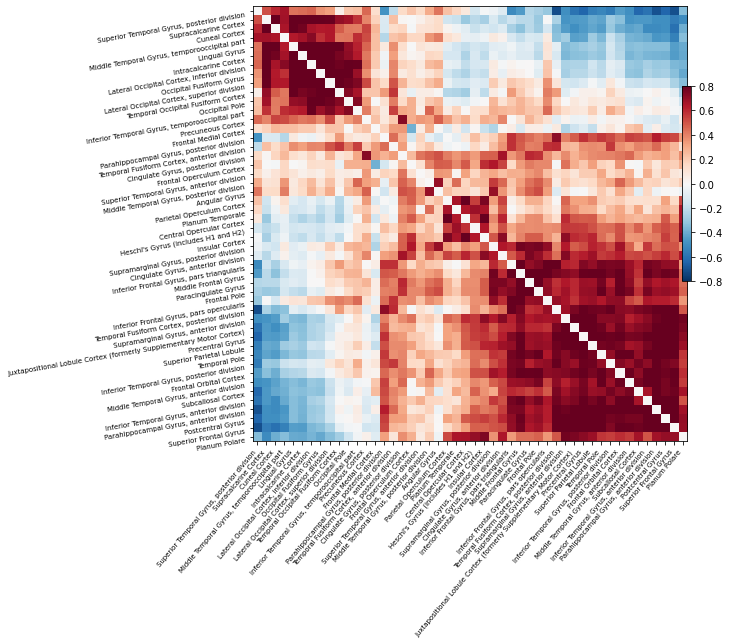

In [31]:
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the correlation matrix
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=True)

C:\Users\alexf\Anaconda3\envs\CSML1030\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexf\Anaconda3\envs\CSML1030\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexf\Anaconda3\envs\CSML1030\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opene

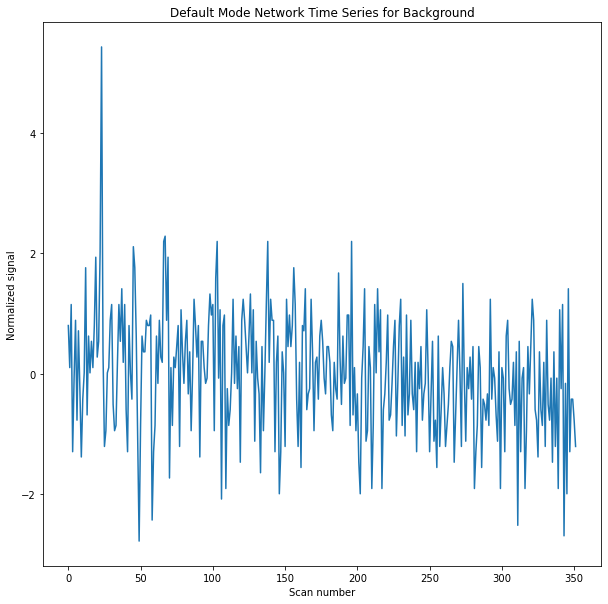

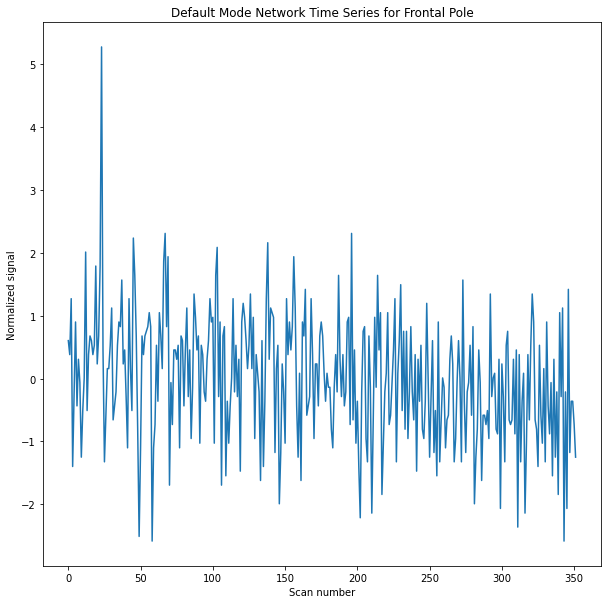

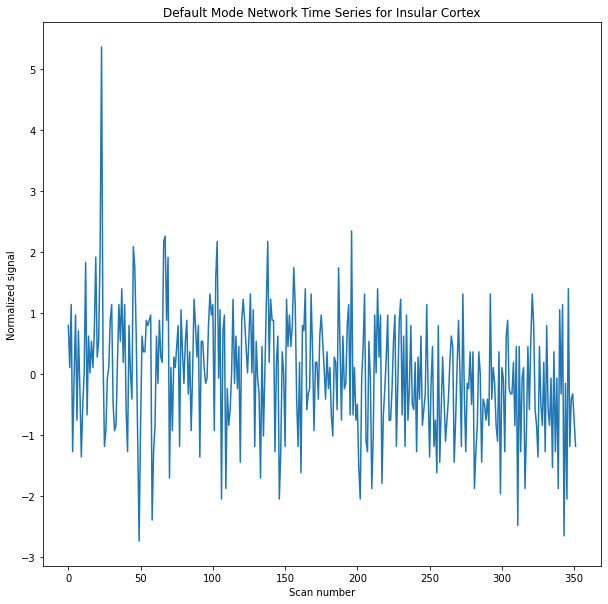

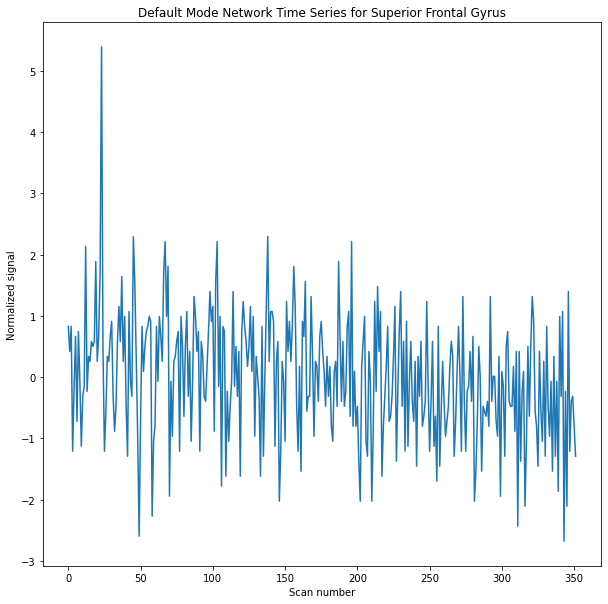

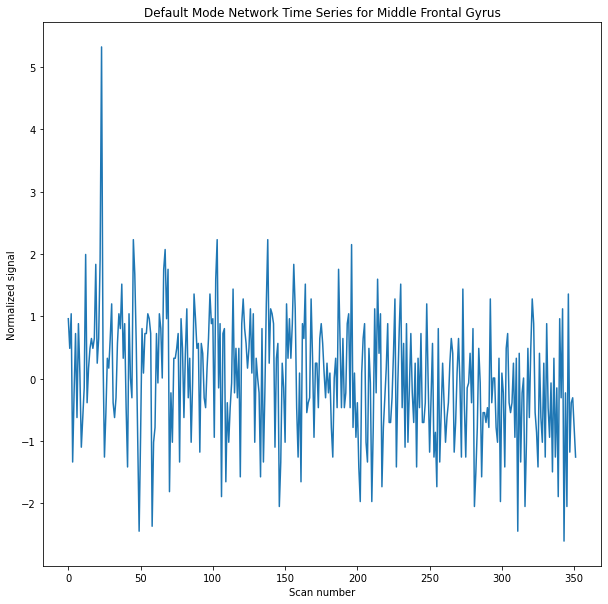

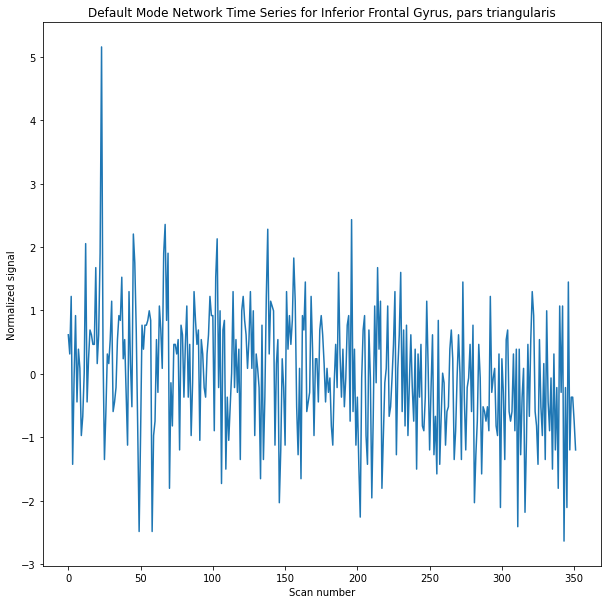

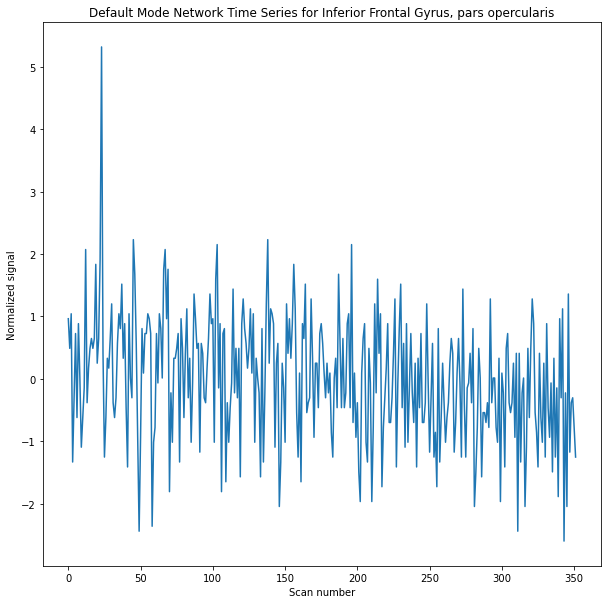

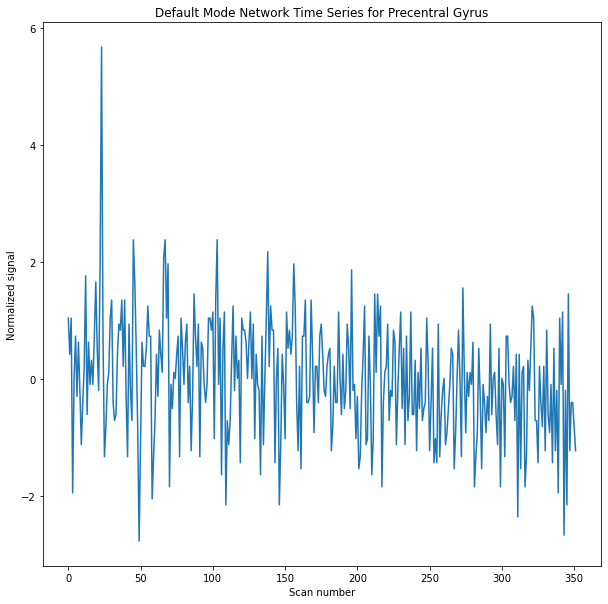

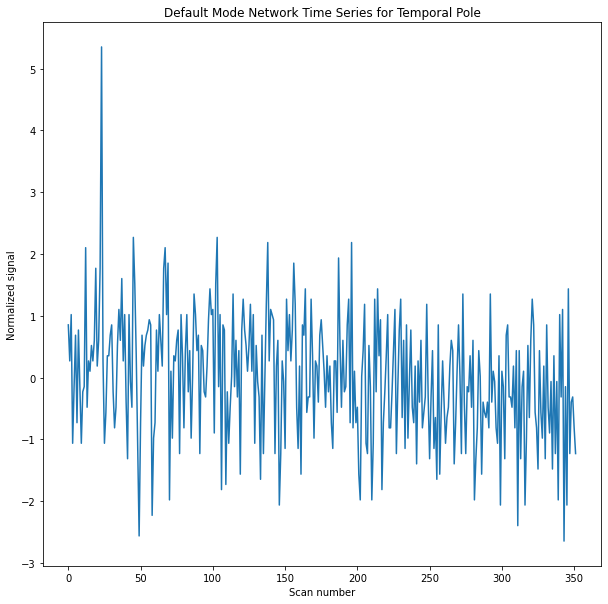

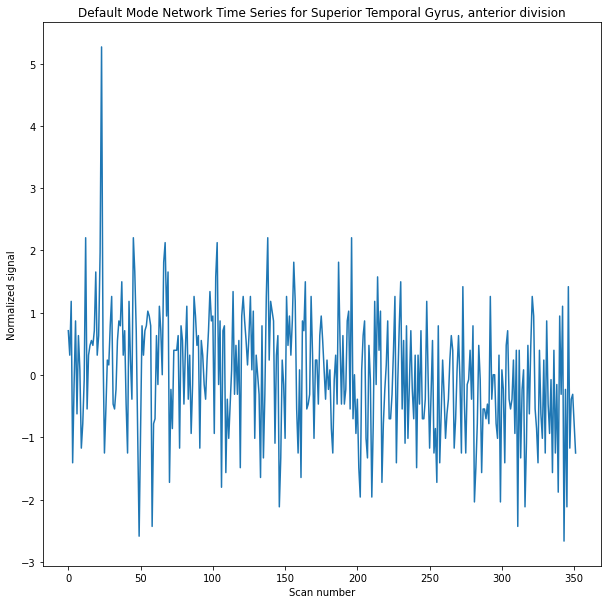

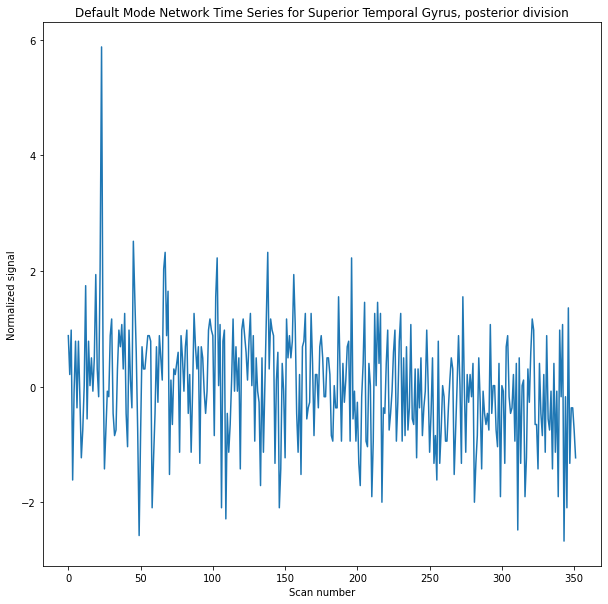

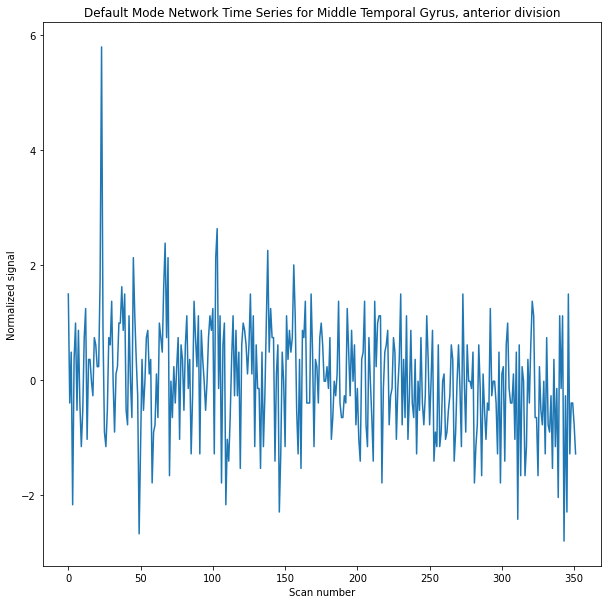

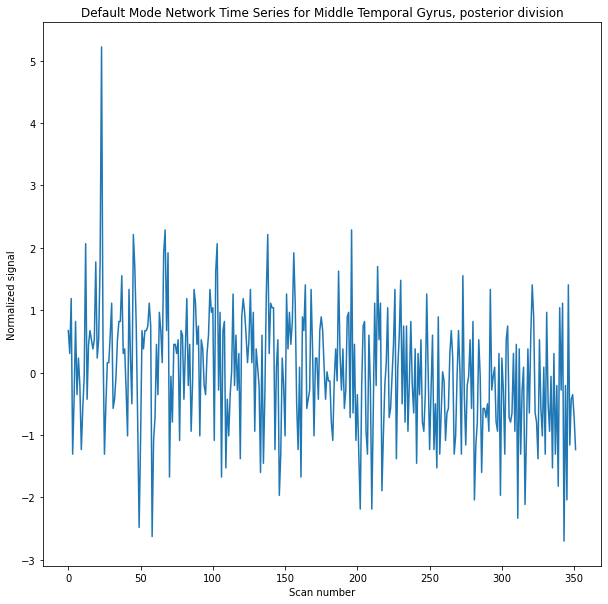

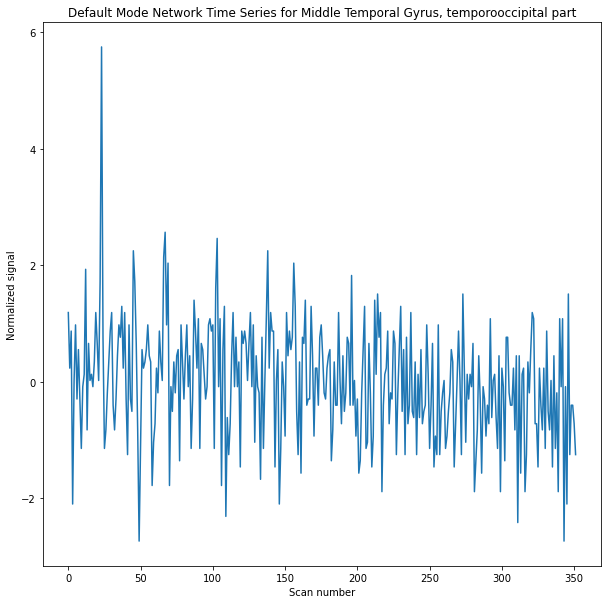

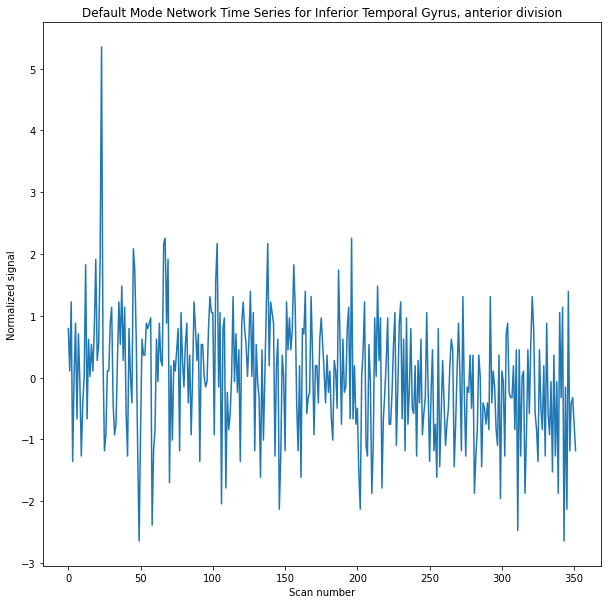

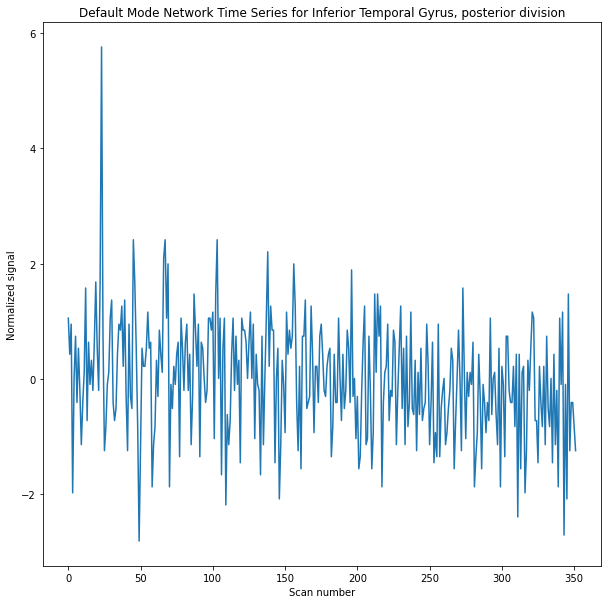

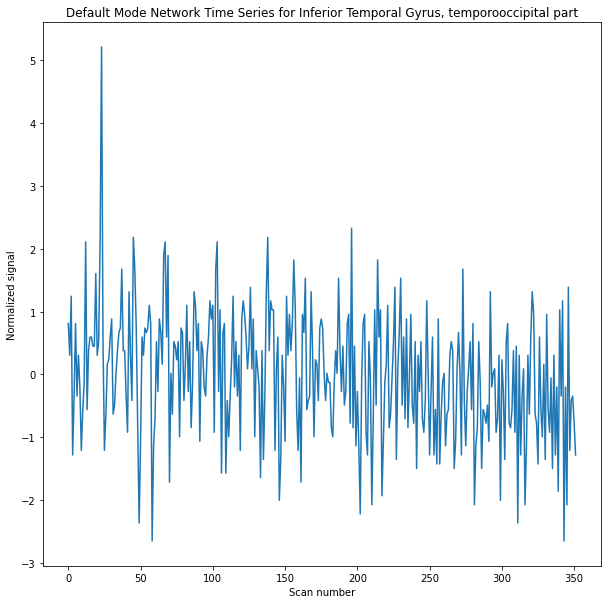

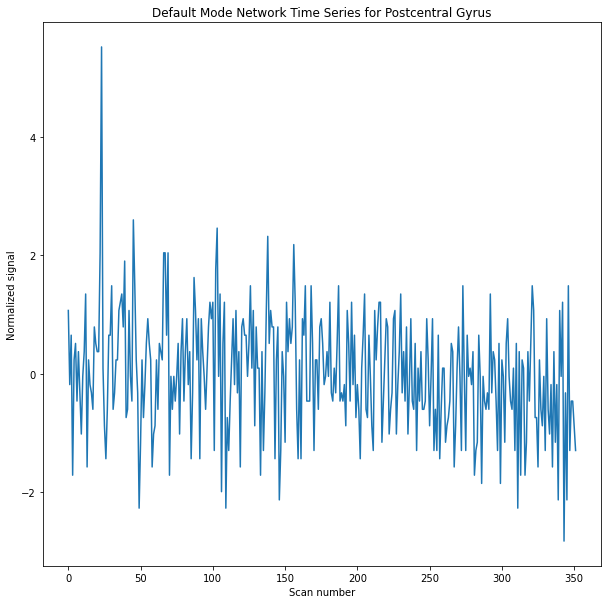

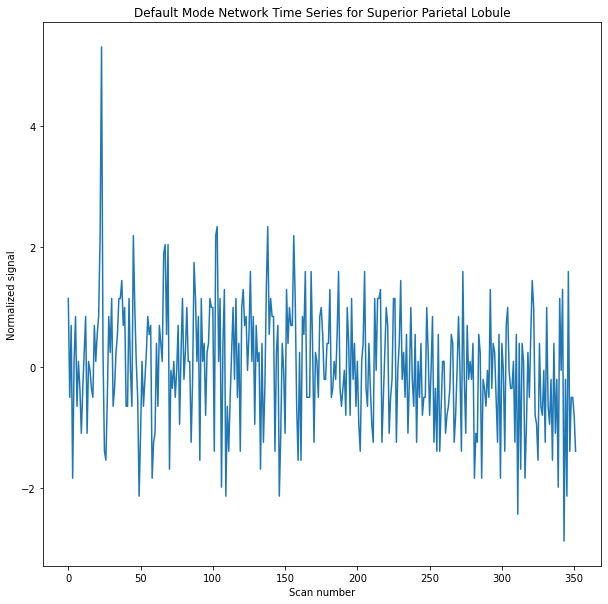

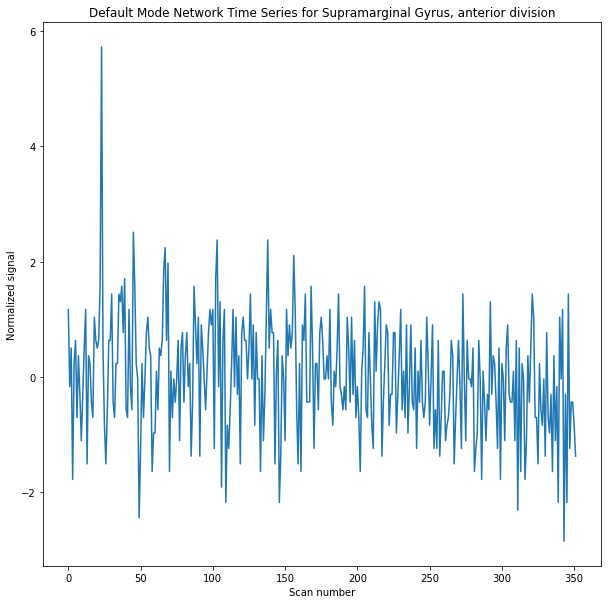

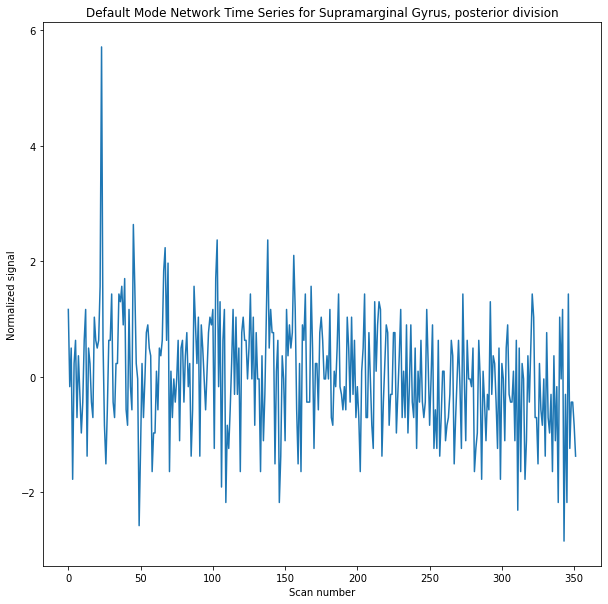

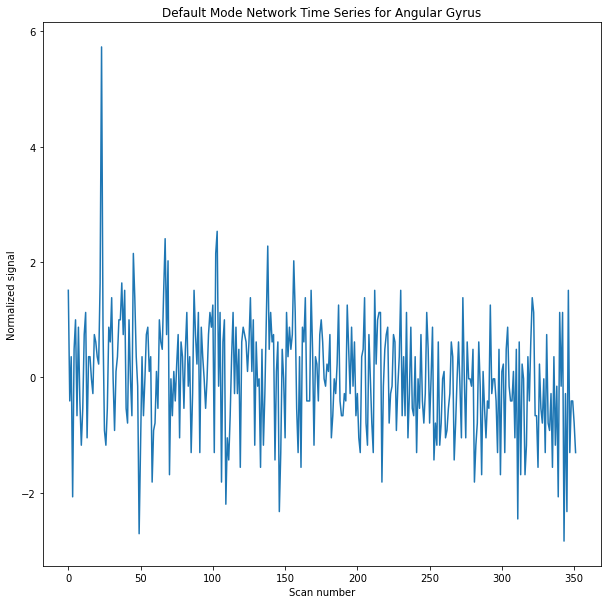

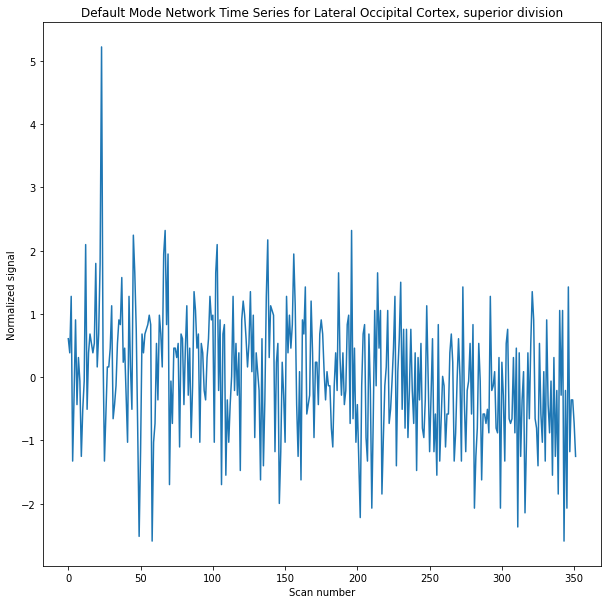

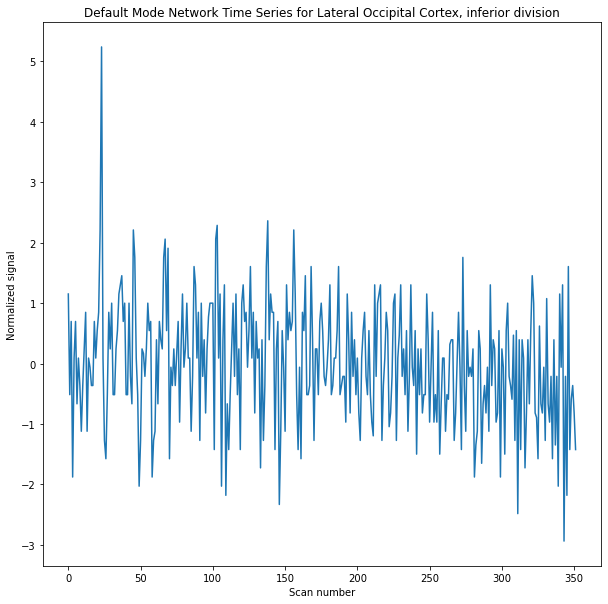

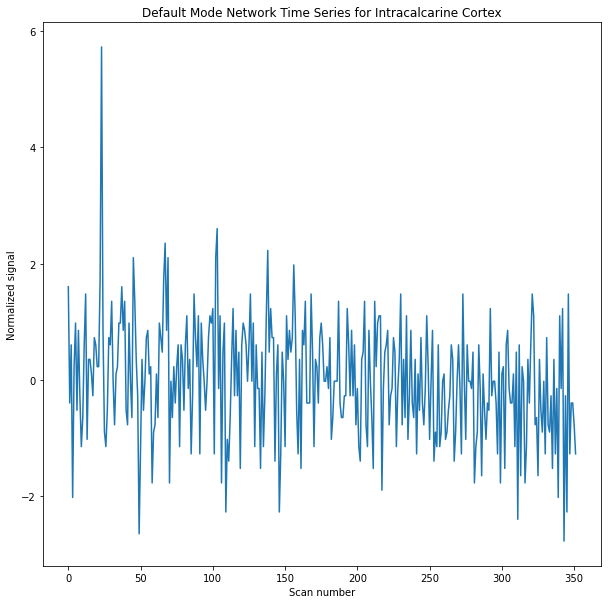

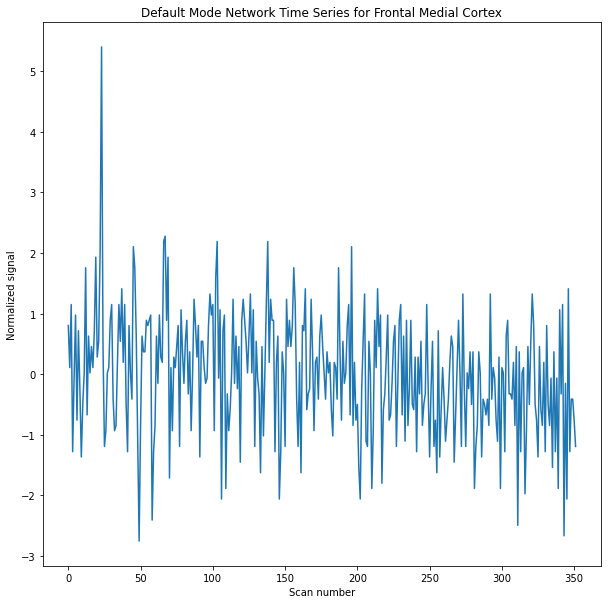

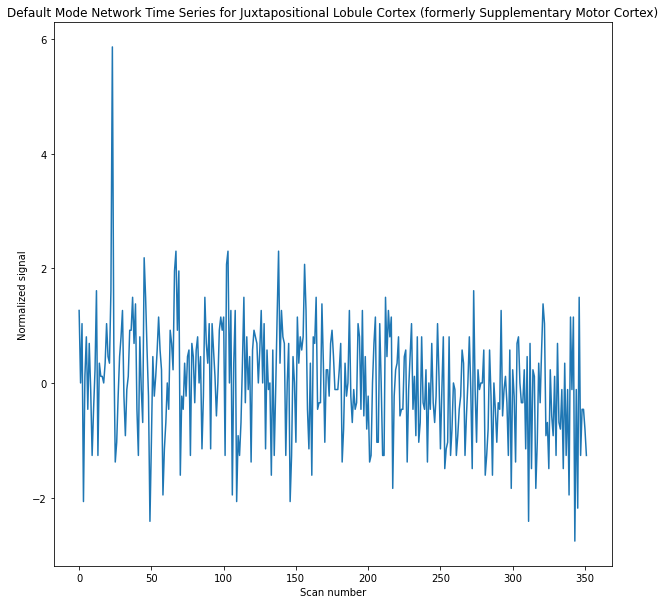

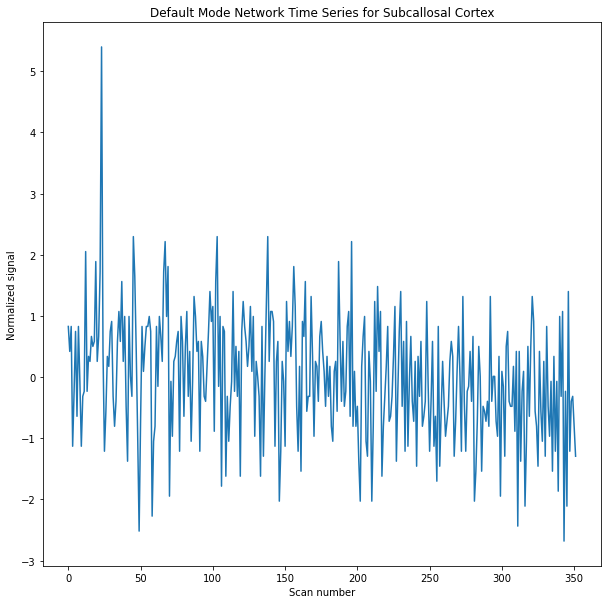

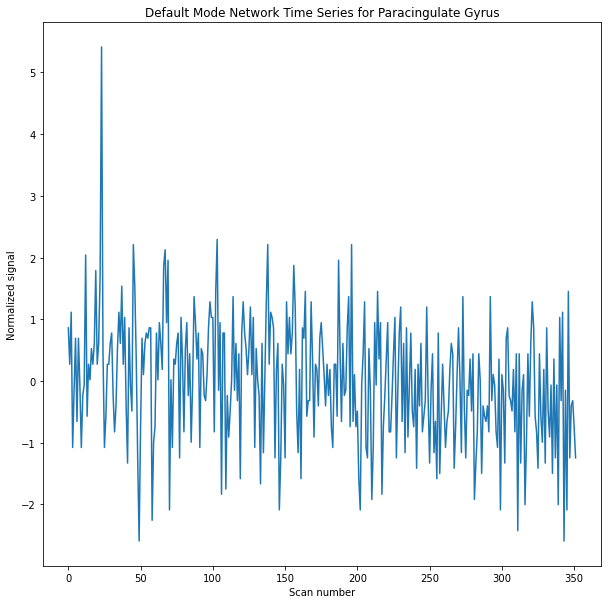

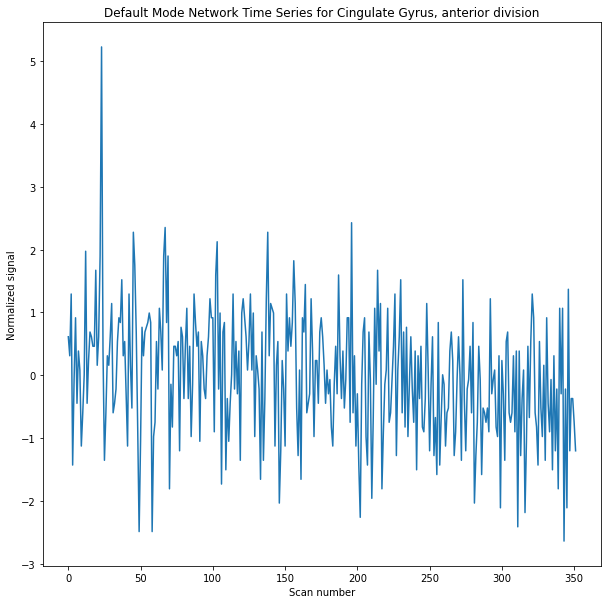

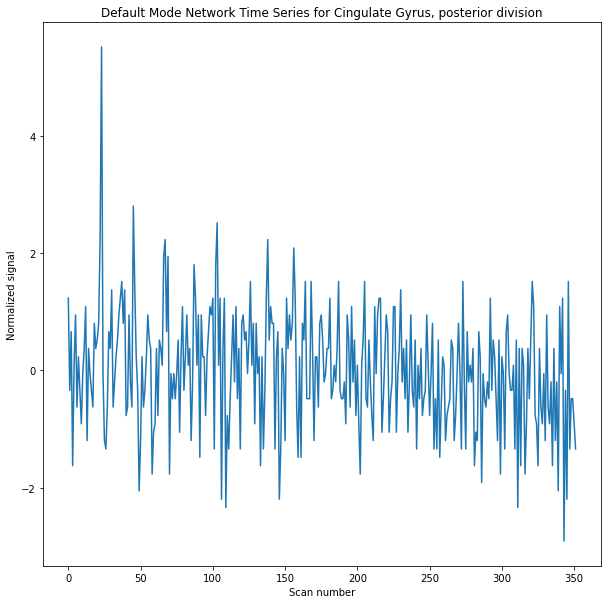

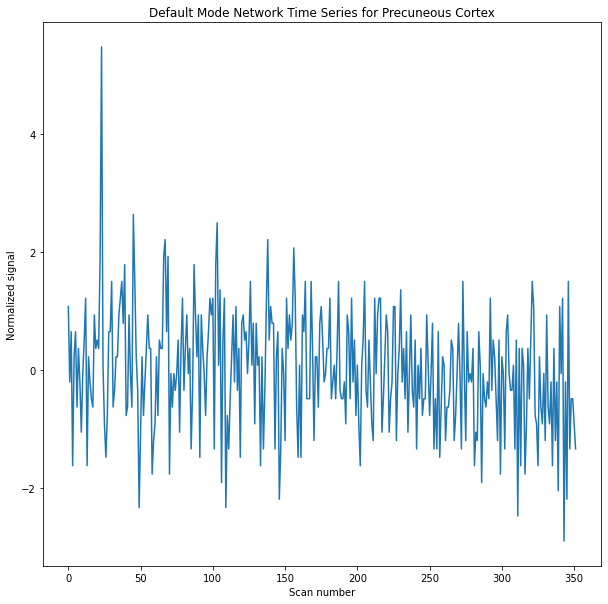

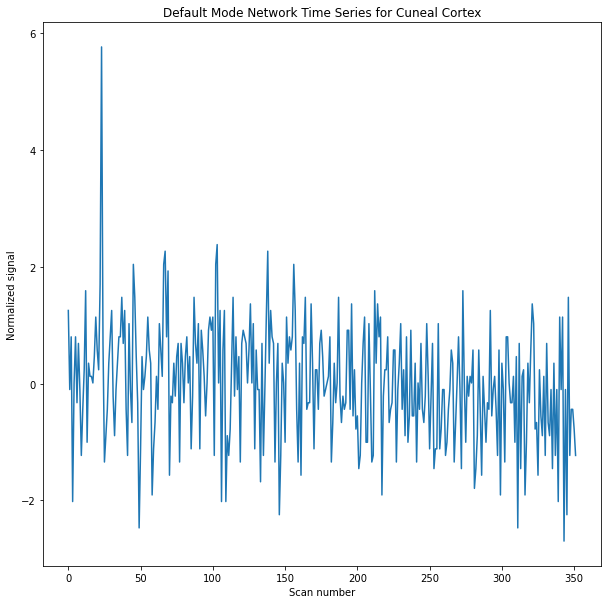

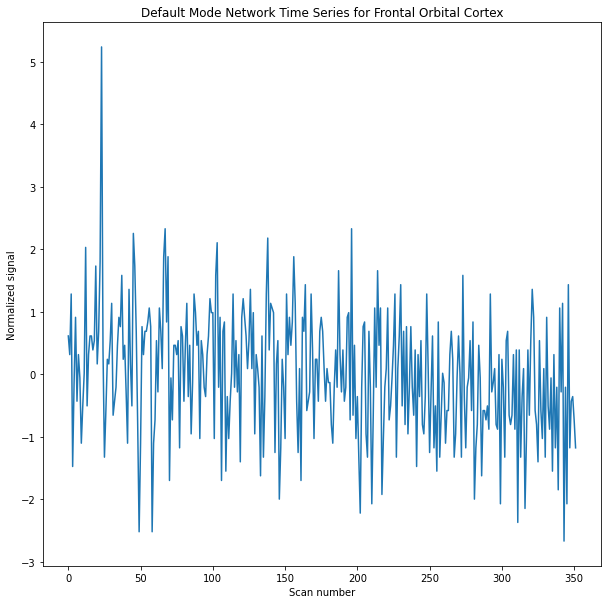

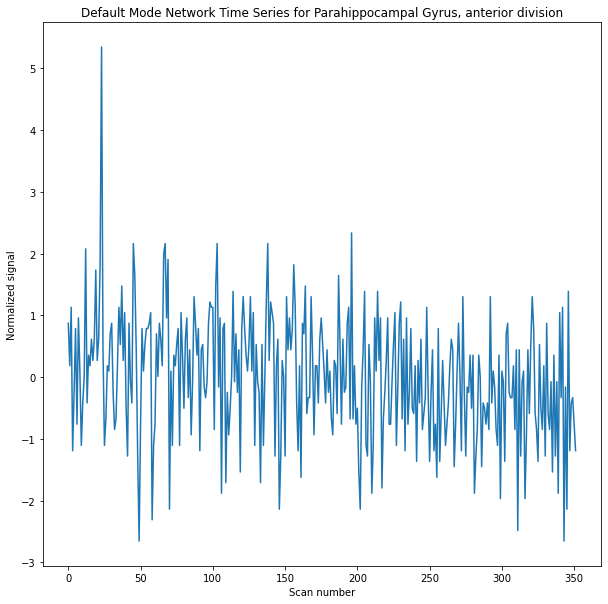

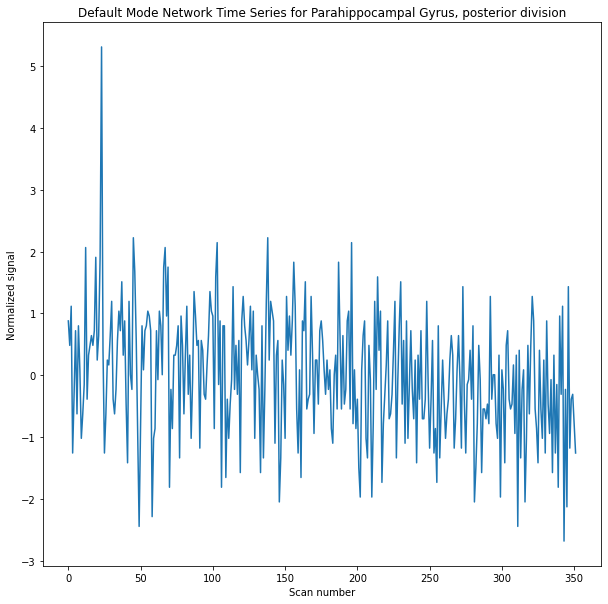

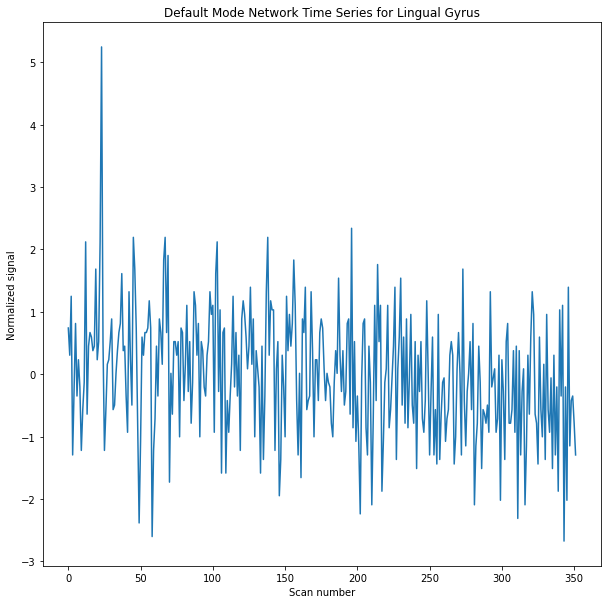

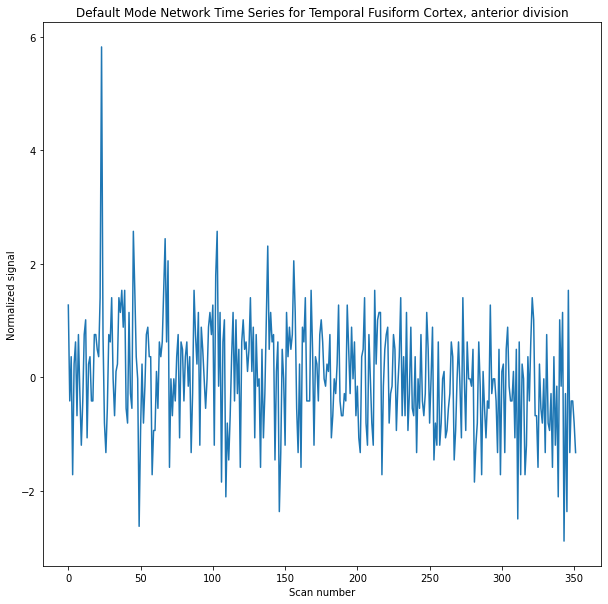

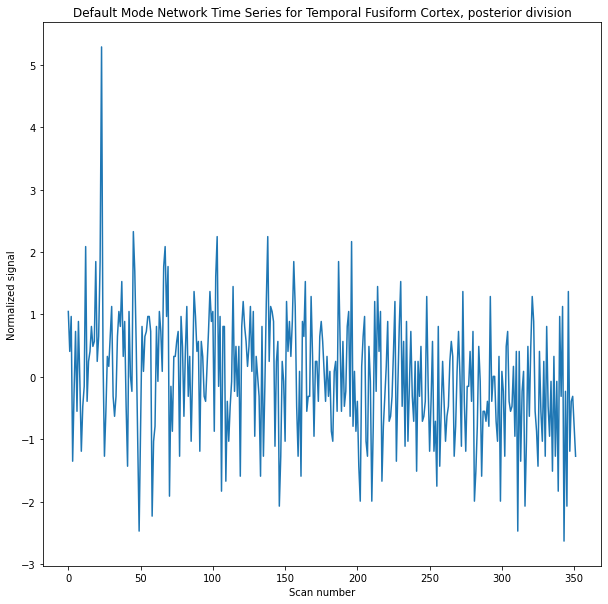

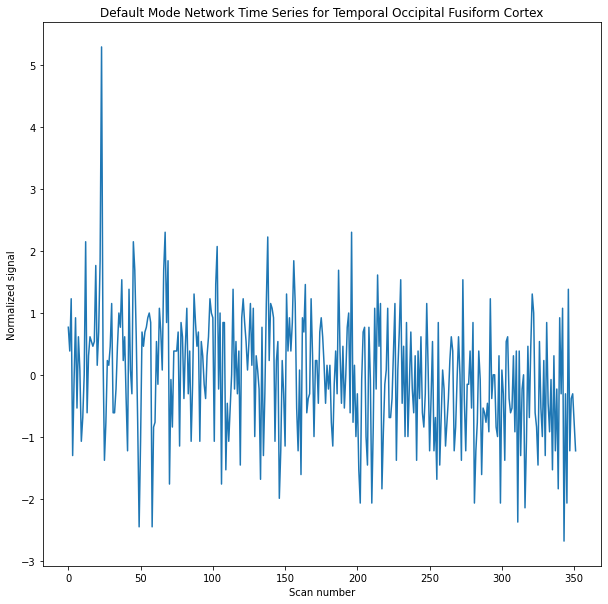

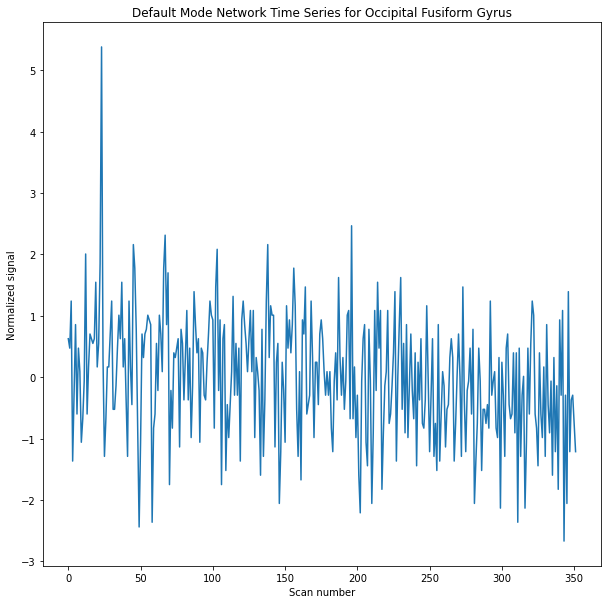

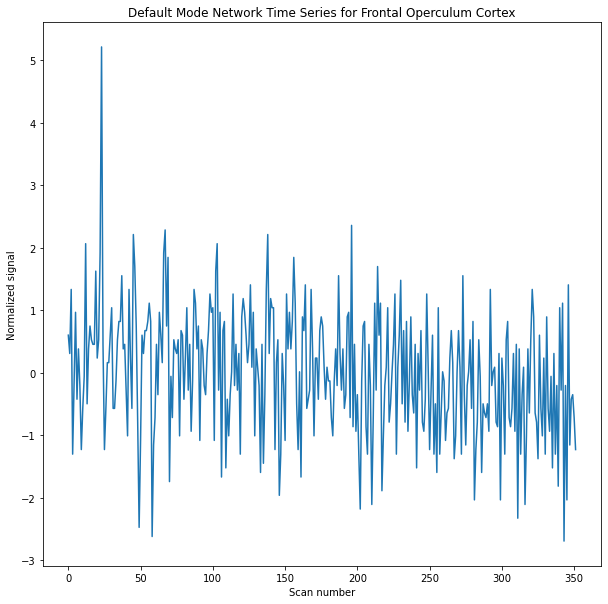

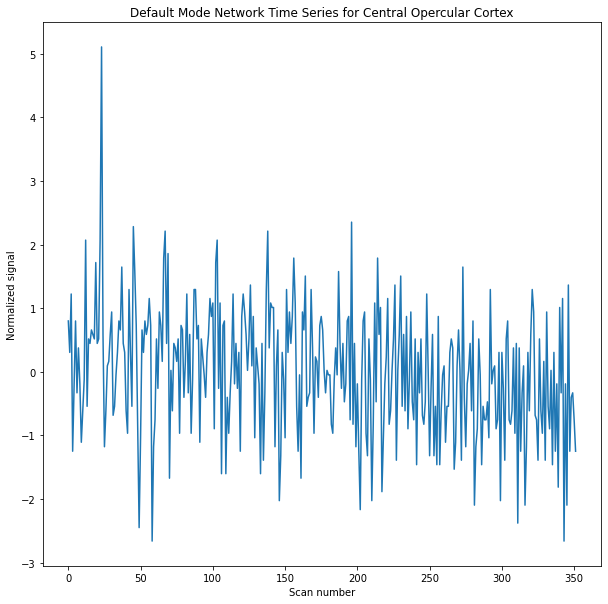

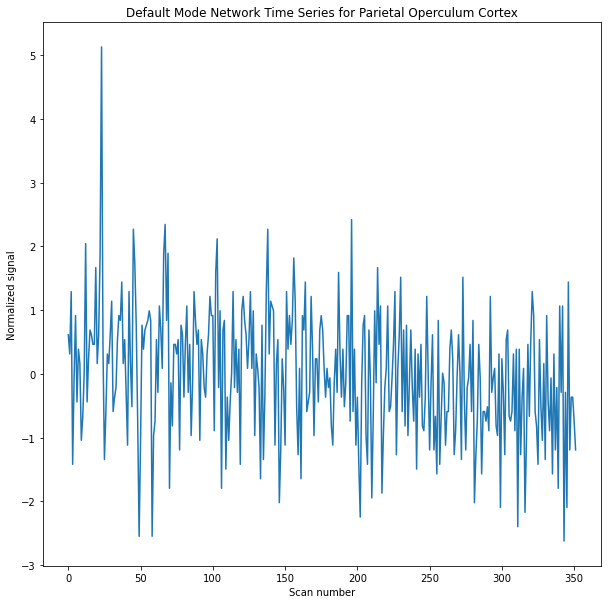

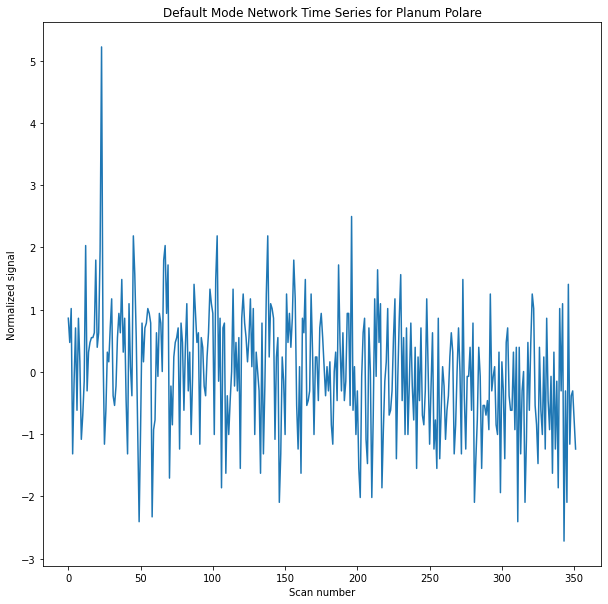

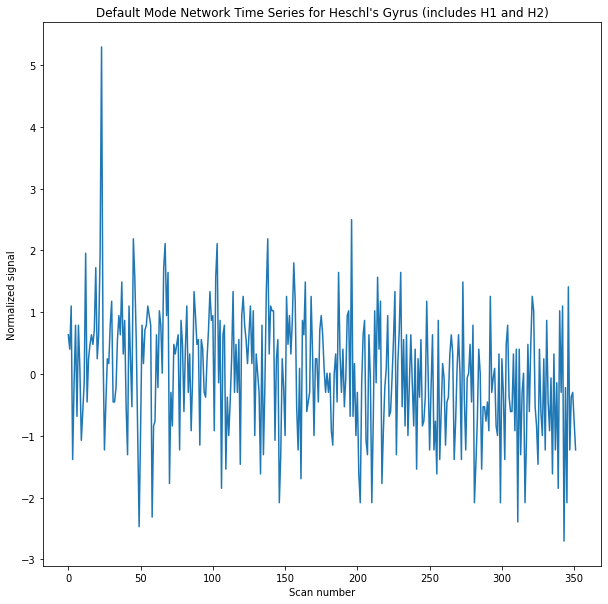

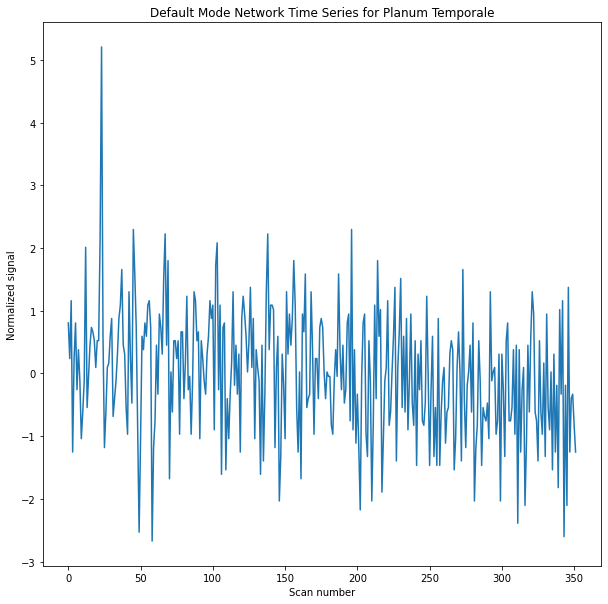

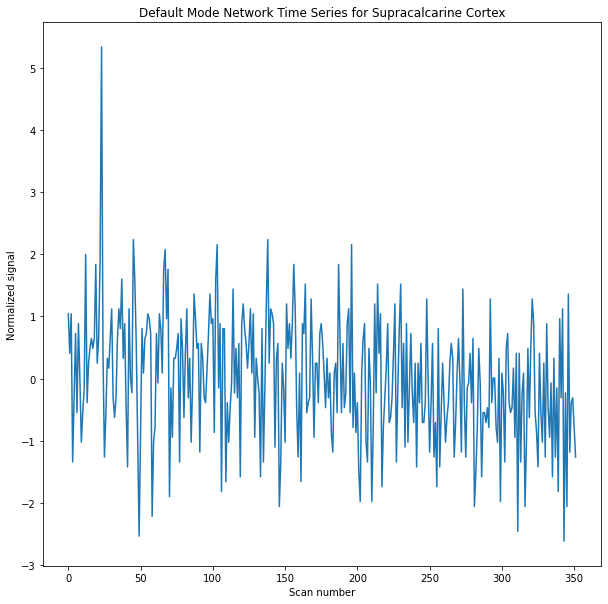

In [20]:
for time_serie, label in zip(time_series.T, labels):
    #plt.figure(figsize=(5,5))
    plt.figure(figsize=(10, 10))
    plt.plot(time_serie, label=label)
    plt.title('Default Mode Network Time Series for ' + label)
    plt.xlabel('Scan number')
    plt.ylabel('Normalized signal')
    


#plt.legend()
#plt.tight_layout()

## Compute partial correlation matrix

In [21]:
connectivity_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrix = connectivity_measure.fit_transform(
    [time_series])[0]

In [22]:
partial_correlation_matrix

array([[ 1.        ,  0.01327379,  0.16482512, ...,  0.01265521,
        -0.02762208, -0.01793711],
       [ 0.01327379,  1.        ,  0.00419179, ...,  0.02686092,
         0.00291662,  0.00402822],
       [ 0.16482512,  0.00419179,  1.        , ..., -0.0117273 ,
        -0.019493  , -0.00644037],
       ...,
       [ 0.01265521,  0.02686092, -0.0117273 , ...,  1.        ,
         0.03666268,  0.04662453],
       [-0.02762208,  0.00291662, -0.019493  , ...,  0.03666268,
         1.        ,  0.00495694],
       [-0.01793711,  0.00402822, -0.00644037, ...,  0.04662453,
         0.00495694,  1.        ]])

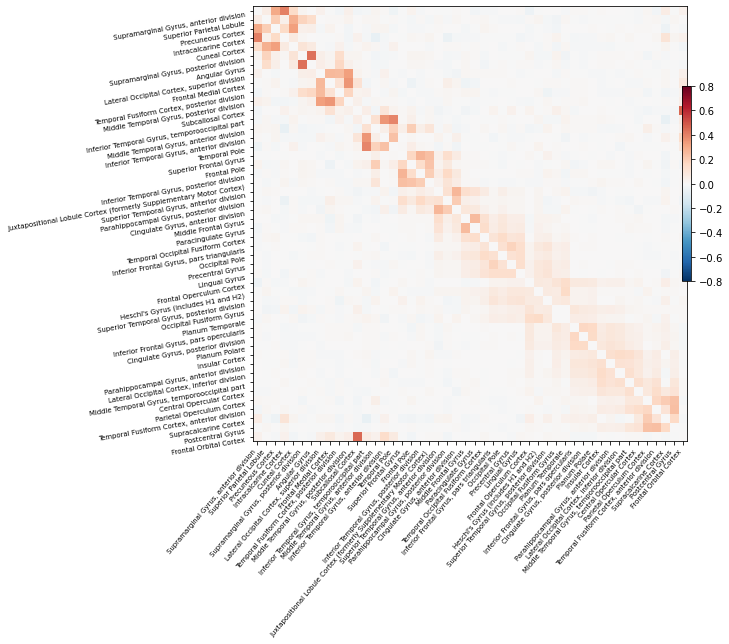

In [23]:
# Mask the main diagonal for visualization:
np.fill_diagonal(partial_correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(partial_correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=True)

## Display connectome

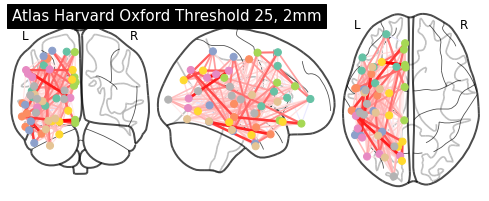

In [24]:
# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectivity_measure.mean_

# grab center coordinates for atlas labels
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_filename)

# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="80%",
                         title='Atlas Harvard Oxford Threshold 25, 2mm')

In [25]:
# grab center coordinates for probabilistic atlas
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img=atlas_filename)

# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="80%", title='MSDL (probabilistic)')

DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a 3D image. See http://nilearn.github.io/manipulating_images/input_output.html.